In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# Assign the dow class to a variable called `Dow`
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# use inspector to find the tables, print the column names within the table and its types
from sqlalchemy import create_engine, inspect

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [10]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"]) 

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

1. Find the most recent date in the dataset.
2. Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.
3. Select only the "date" and "prcp" values.
4. Load the query results into a Pandas DataFrame, and set the index to the "date" column.
5. Sort the DataFrame values by "date".
6. Plot the results by using the DataFrame plot method
7. Use Pandas to print the summary statistics for the precipitation data

In [12]:
# Display the row's columns and data in dictionary format in order to display how date is stored in the database
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe6aa52bdf0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1}

In [13]:
# 1
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
recent_date = (dt.datetime.strptime(recent_date, "%Y-%m-%d")).date()
print("Recent Date:", recent_date)

Recent Date: 2017-08-23


In [14]:
# 2
# Calculate the date one year from the last date in data set.
start_date = recent_date - dt.timedelta(days=365)
print("Date 12months ago: ", start_date)

Date 12months ago:  2016-08-23


In [15]:
# 3
# Using the recent and start date, perform a query to retrieve the data and precipitation scores
sel = [measurement.date,
       measurement.prcp]

precip_results = session.query(*sel).\
                  filter(measurement.date <= recent_date).filter(measurement.date >= start_date).\
                  order_by(measurement.date).all()

print_results = [{"Date": result[0], "Precip": result[1]} for result in precip_results]
print_results


[{'Date': '2016-08-23', 'Precip': 0.0},
 {'Date': '2016-08-23', 'Precip': 0.15},
 {'Date': '2016-08-23', 'Precip': 0.05},
 {'Date': '2016-08-23', 'Precip': None},
 {'Date': '2016-08-23', 'Precip': 0.02},
 {'Date': '2016-08-23', 'Precip': 1.79},
 {'Date': '2016-08-23', 'Precip': 0.7},
 {'Date': '2016-08-24', 'Precip': 0.08},
 {'Date': '2016-08-24', 'Precip': 2.15},
 {'Date': '2016-08-24', 'Precip': 2.28},
 {'Date': '2016-08-24', 'Precip': None},
 {'Date': '2016-08-24', 'Precip': 1.22},
 {'Date': '2016-08-24', 'Precip': 2.15},
 {'Date': '2016-08-24', 'Precip': 1.45},
 {'Date': '2016-08-25', 'Precip': 0.08},
 {'Date': '2016-08-25', 'Precip': 0.08},
 {'Date': '2016-08-25', 'Precip': 0.0},
 {'Date': '2016-08-25', 'Precip': 0.0},
 {'Date': '2016-08-25', 'Precip': 0.21},
 {'Date': '2016-08-25', 'Precip': 0.06},
 {'Date': '2016-08-25', 'Precip': 0.11},
 {'Date': '2016-08-26', 'Precip': 0.0},
 {'Date': '2016-08-26', 'Precip': 0.03},
 {'Date': '2016-08-26', 'Precip': 0.02},
 {'Date': '2016-08-26

In [16]:
# 4 & 5
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_results, columns=['Date', 'Precipitation'])
precip_df.dropna(axis=0, how="any", inplace=True)
precip_df.sort_values(by='Date')
precip_df.set_index('Date', inplace=True)
precip_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


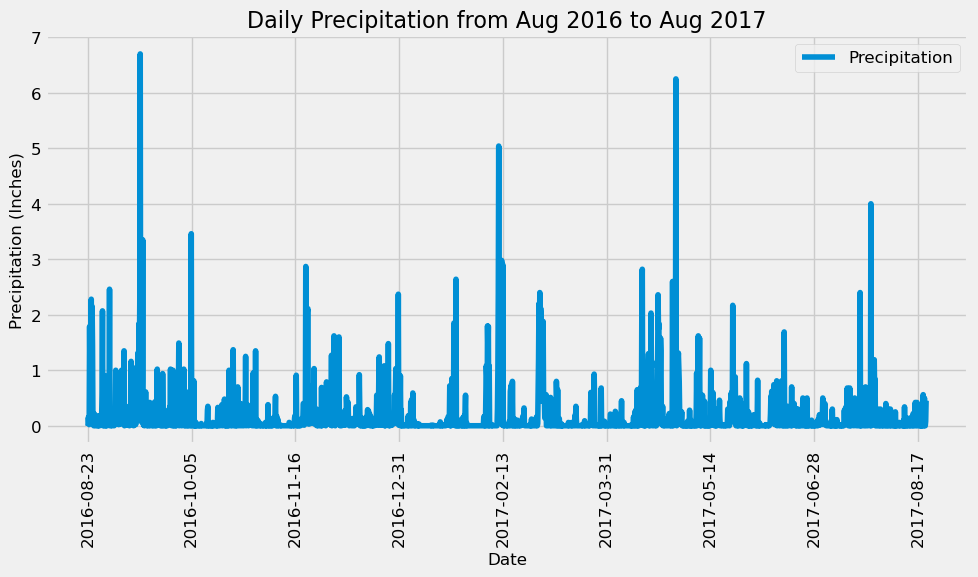

In [17]:
# 6
# Use Pandas Plotting with Matplotlib to plot the data
# Create a bar plot
precip_df.plot(figsize=(10,6), fontsize=12, rot=90)

# Add labels and title
plt.legend(['Precipitation'], loc='upper right', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Precipitation (Inches)', fontsize=12)
plt.title('Daily Precipitation from Aug 2016 to Aug 2017', fontsize=16)

plt.tight_layout()
plt.savefig("Precip_Aug2016-2017.png")
plt.show()


In [19]:
# 7
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = precip_df['Precipitation'].describe()
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

1. Design a query to calculate the total number of stations in the dataset.

2. Design a query to find the most-active stations (that is, the stations that have the most rows). To do so, complete the following steps:

    - List the stations and observation counts in descending order.
    - Which station id has the greatest number of observations?

3. Design a query that calculates the lowest, highest, and average temperatures that filters on the most-active station id found in the previous query.

4. Design a query to get the previous 12 months of temperature observation (TOBS) data. To do so, complete the following steps:

    - Filter by the station that has the greatest number of observations.
    - Query the previous 12 months of TOBS data for that station.
    - Plot the results as a histogram with bins=12

5. Close your session.

In [21]:
# 1
# Design a query to calculate the total number stations in the dataset
no_station = session.query(func.count(station.station)).all()

print(f"There are {no_station} stations in the dataset.\n")

There are [(9,)] stations in the dataset.



In [22]:
# 2
# What are the most active stations? (i.e. what stations have the most rows)?
activity_stations = session.query(measurement.station, func.count(measurement.station)).\
                  order_by(func.count(measurement.station).desc()).\
                  group_by(measurement.station).\
                  all()

# Display the stations and the counts in descending order.
activity_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# 3
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# Based on previous query, identify the most active
most_active_station = activity_stations[0][0]

# Calculate lowest temp recorded at station USC00519281
min_temp = session.query(func.min(measurement.tobs)).\
              filter(measurement.station == most_active_station).scalar()
              
print(f"Lowest temperature at {most_active_station}: {min_temp}F.")

# Calculate max temp recorded at station USC00519281
max_temp = session.query(func.max(measurement.tobs)).\
              filter(measurement.station == most_active_station).scalar()

print(f"Highest temperature at {most_active_station}: {max_temp}F.")

# Calculate average temp recorded at station USC00519281
avg_temp = session.query(func.avg(measurement.tobs)).\
              filter(measurement.station == most_active_station).scalar()

print(f"Average temperature at {most_active_station}: {round(avg_temp, 2)}F.")


Lowest temperature at USC00519281: 54.0F.
Highest temperature at USC00519281: 85.0F.
Average temperature at USC00519281: 71.66F.


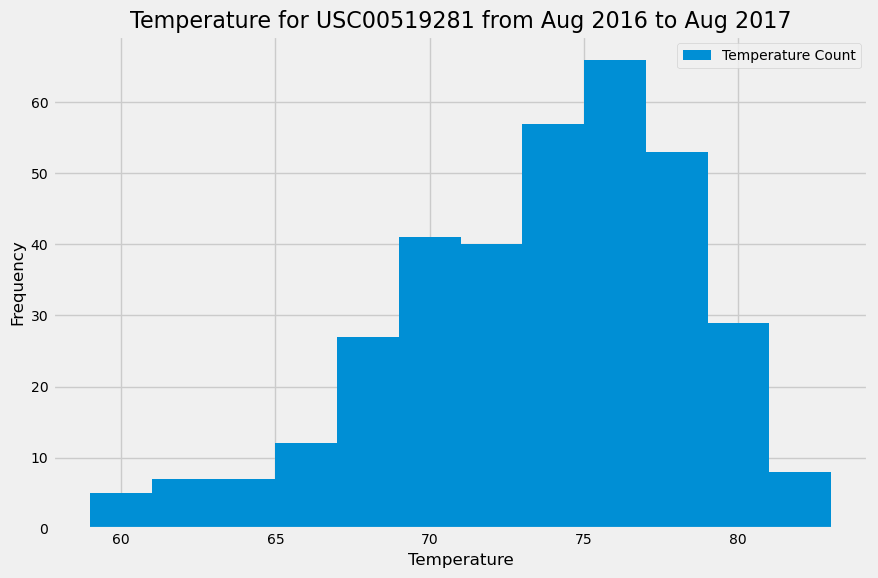

In [26]:
# 4
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_act_station = pd.DataFrame(session.query(measurement.tobs).\
                                filter(measurement.station == most_active_station).\
                                filter(measurement.date <= recent_date).\
                                filter(measurement.date >= start_date).all())

most_act_station.plot(kind="hist", figsize=(9,6), bins=12, legend=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Temperature Count'], loc='upper right', fontsize=10)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Temperature for {most_active_station} from Aug 2016 to Aug 2017", fontsize=16)

plt.tight_layout()
plt.savefig("USC00519281_temps.png")
plt.show()

# Close session

In [25]:
# Close Session
session.close()